In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
%matplotlib inline

In [208]:
data_train=pd.read_csv('/content/drive/My Drive/Financial_Risk_Participants_Data/Train.csv')
data_test=pd.read_csv('/content/drive/My Drive/Financial_Risk_Participants_Data/Test.csv')
data_train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [209]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


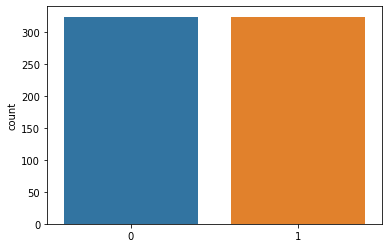

In [175]:
sns.countplot(y_new)

(array([98., 90., 82., 94., 78., 92.,  3.,  2.,  3.,  1.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Patch objects>)

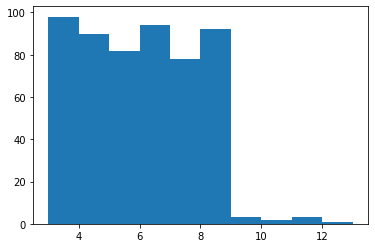

In [177]:
plt.hist(data_train['Loss_score'])

In [210]:
print(data_train['Loss_score'].unique(),data_train['Past_Results'].unique())

[ 6  8  3  7  4  5 11  9 10 13] [ 0  1  2  3  4  6 10]


In [211]:
print(list(data_train['Loss_score']).count(9),list(data_train['Past_Results']).count(2))

3 13


In [212]:
y=data_train['IsUnderRisk']
x=data_train.drop(['IsUnderRisk','City','Location_Score'],axis=1)
smote=over_sampling.SMOTE(sampling_strategy=1.0,random_state=100)
x_new,y_new=smote.fit_sample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,stratify=y_new,random_state=42,train_size=0.8)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
stdsc=StandardScaler()
x_train=stdsc.fit_transform(x_train)
x_test=stdsc.transform(x_test)

In [213]:
#using SVM
a=[10**x for x in range(-5,1)]
for i in a:
  sgd=SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
  sgd.fit(x_train,y_train)
  clf=CalibratedClassifierCV(sgd,method='sigmoid')
  clf.fit(x_train,y_train)
  predicted=sgd.predict(x_test)
  predict=clf.predict_proba(x_test)
  print('for alpha=',i,'log loss=',log_loss(y_test,predict),'accuracy=',accuracy_score(y_test,predicted))

for alpha= 1e-05 log loss= 0.33101665361650173 accuracy= 0.8455882352941176
for alpha= 0.0001 log loss= 0.32123148848461286 accuracy= 0.8455882352941176
for alpha= 0.001 log loss= 0.32011853751970787 accuracy= 0.875
for alpha= 0.01 log loss= 0.3182087732336625 accuracy= 0.8823529411764706
for alpha= 0.1 log loss= 0.3270303352726237 accuracy= 0.875
for alpha= 1 log loss= 0.4628612797393003 accuracy= 0.8382352941176471


In [214]:
#using LR
a=[10**x for x in range(-5,1)]
for i in a:
  sgd=SGDClassifier(loss='log',penalty='l2',alpha=i,class_weight='balanced')
  sgd.fit(x_train,y_train)
  clf=CalibratedClassifierCV(sgd,method='sigmoid')
  clf.fit(x_train,y_train)
  predicted=sgd.predict(x_test)
  predict=clf.predict_proba(x_test)
  print('for alpha=',i,'log loss=',log_loss(y_test,predict),'accuracy=',accuracy_score(y_test,predicted))

for alpha= 1e-05 log loss= 0.33139893721886216 accuracy= 0.8235294117647058
for alpha= 0.0001 log loss= 0.32180188822064154 accuracy= 0.8676470588235294
for alpha= 0.001 log loss= 0.3204351118637988 accuracy= 0.8529411764705882
for alpha= 0.01 log loss= 0.31983549497447505 accuracy= 0.8382352941176471
for alpha= 0.1 log loss= 0.3335329032759037 accuracy= 0.8455882352941176
for alpha= 1 log loss= 0.4452257291285163 accuracy= 0.7941176470588235


In [215]:
#using random forest
rfg=RandomForestClassifier(max_depth=7,n_estimators=1000,min_samples_leaf=3,criterion='entropy',max_features=3)
rfg.fit(x_train,y_train)
predicted1=rfg.predict(x_test)
predict1=rfg.predict_proba(x_test)
predicted2=rfg.predict(x_train)
predict2=rfg.predict_proba(x_train)

print('test log loss=',log_loss(y_test,predict1),'test accuracy=',accuracy_score(y_test,predicted1))
print('train log loss=',log_loss(y_train,predict2),'train accuracy=',accuracy_score(y_train,predicted2))


test log loss= 0.22533412480284412 test accuracy= 0.9338235294117647
train log loss= 0.25506983144316697 train accuracy= 0.8915441176470589


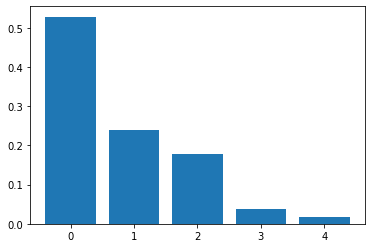

In [188]:
a=rfg.feature_importances_
plt.bar(range(len(a)),a)
plt.show()

In [106]:
# using GridSearchCV on randomforest
params={'criterion':['gini','entropy'],'max_depth':[3,5,7,10],'max_features':[3,4,5],'min_samples_leaf':[2,3,4],'n_estimators':[1000]}
grd=GridSearchCV(estimator=rfg,param_grid=params)
grd.fit(x_train,y_train)

KeyboardInterrupt: ignored

In [0]:
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 1000}


In [189]:
#using XGBoost
xgb=XGBClassifier(booster='gbtree',learning_rate=0.05,max_depth=3,colsample_bytree=0.5,gamma=2,reg_lambda=1,min_child_weight=4,n_estimators=1000)
xgb.fit(x_train,y_train)
predicted=xgb.predict(x_test)
predict=xgb.predict_proba(x_test)
print('log loss=',log_loss(y_test,predict),'accuracy=',accuracy_score(y_test,predicted))

log loss= 0.26068909995508593 accuracy= 0.9230769230769231


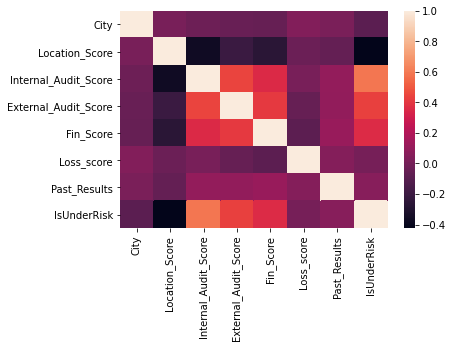

In [190]:
sns.heatmap(data_train.corr())

In [0]:
#check the multi-colinearity
def multi_colinearity(data):
  column=data.columns
  vif1=[]
  for i in column:
    y1=x[i]
    x1=x.drop([i],axis=1)
    model=sm.OLS(y1,sm.add_constant(x1)).fit()
    rsq=model.rsquared
    vif=1/(1-rsq**2)
    vif1.append(vif)
  result=pd.DataFrame({'feature':column,'vif':vif1})
  return result  


In [192]:
vif=multi_colinearity(x)
print(vif)

                feature       vif
0  Internal_Audit_Score  1.061279
1  External_Audit_Score  1.081419
2             Fin_Score  1.049999
3            Loss_score  1.000186
4          Past_Results  1.000528


In [0]:
#using GridsearchCV on xgb
params={'booster':['gbtree','gblinear','dart'],'learning_rate':[0.05,0.1,0.3],'max_depth':[3,5,7,10],'colsample_bytree':[0.5,0.8],'gamma':[2,3],'reg_lambda':[0,1,2],'min_child_weight':[2,3,4],'n_estimators':[1000]}
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(x_train,y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=3,
                                     learning_rate=0.3, max_delta_step=0,
                                     max_depth=3, min_child_weight=3,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=0,
                                     scal...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'colsample_bytree': [0.5, 0.8], 'gamma': [2, 3],
                         'learning_rate': [0.05, 0.1, 0.3],
       

In [0]:
print(grd.best_params_)

{'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 2, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 1000, 'reg_lambda': 1}


In [87]:
data_test=data_test.drop(['City','Location_Score'],axis=1)
data_test.head()

,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,13,12,9,7,0
1,6,10,7,4,1
2,3,3,7,8,0
3,15,10,7,4,1
4,7,3,8,3,1


In [114]:
#data_test=data_test.drop(['City','Location_Score'],axis=1)
predictions=rfg.predict_proba(data_test)
result=pd.DataFrame(predictions)
result.columns=['0','1']
result.head()

,0,1
0,0.000000,1.000000
1,0.097645,0.902355
2,0.848438,0.151562
3,0.000000,1.000000
4,0.743573,0.256427


In [0]:
result.to_excel('predictions1.xlsx',index=False)

In [193]:
d_train=lgb.Dataset(x_train,label=y_train)
params = {}
params['learning_rate'] = 0.2
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.4
params['num_leaves'] = 200
params['min_data_in_leaf'] = 10
params['max_depth'] = 7
params['max_bin']=50
params['bagging_fraction']=0.5
params['feature_fraction']=0.5
params['num_iterations']=100
clf = lgb.train(params, d_train, 100)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [194]:
predict_train=clf.predict(x_train)
predict_test=clf.predict(x_test)
for i in range(predict_train.shape[0]):
  if predict_train[i]>=0.5:
    predict_train[i]=1
  else:
    predict_train[i]=0  
for i in range(predict_test.shape[0]):
  if predict_test[i]>=0.5:
    predict_test[i]=1
  else:
    predict_test[i]=0
print('training accuracy=',accuracy_score(y_train,predict_train))
print('testing accuracy=',accuracy_score(y_test,predict_test)) 
,

training accuracy= 0.9343629343629344
testing accuracy= 0.9153846153846154


''

In [0]:
print('training log loss=',log_loss(y_train,predict_train),'training accuracy=',accuracy_score(y_train,predict_train))
print('testing log loss=',log_loss(y_test,predict_test),'testing accuracy=',accuracy_score(y_test,predict_t))

In [18]:
print(predict_test)

[0.7173316  0.71796475 0.59356872 0.69032861 0.57101923 0.65051307
 0.65468504 0.57721519 0.71748872 0.58309371 0.59392105 0.57822801
 0.71805655 0.71611585 0.56620588 0.5655315  0.67801797 0.57392691
 0.5917099  0.58002905 0.64443572 0.67640707 0.69360025 0.71757154
 0.71629107 0.7161058  0.60639227 0.71795474 0.63796555 0.71724873
 0.58787266 0.68812961 0.688119   0.57476192 0.61707439 0.66782439
 0.58924286 0.56234006 0.57916912 0.56597669 0.59150948 0.58094299
 0.7161058  0.65478754 0.64381834 0.71767345 0.65857704 0.6461939
 0.5681644  0.6377125  0.71796475 0.71749874 0.58787266 0.58924286
 0.65389363 0.64623064 0.57946184 0.60677417 0.68822691 0.56333653
 0.61326421 0.57476192 0.57061574 0.56442642 0.69378834 0.56780149
 0.71813928 0.55273388 0.58824472 0.57159744 0.61877324 0.58506537
 0.58448841 0.568872   0.56666005 0.69200614 0.71759064 0.55123782
 0.57037    0.69023167 0.68812961 0.60728141 0.65838317 0.63248622
 0.59285986 0.71813928 0.67944912 0.65099275 0.63807141 0.71812

In [242]:
#using DL
from keras import layers
from keras import models
from keras import optimizers
model=models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(5,)))
model.add(layers.Dense(5,activation='relu'))
opt = optimizers.Adam(learning_rate=0.001)
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
544/544 [==============================] - 0s 433us/step - loss: 0.6785 - accuracy: 0.5147
Epoch 2/100
544/544 [==============================] - 0s 274us/step - loss: 0.6523 - accuracy: 0.5551
Epoch 3/100
544/544 [==============================] - 0s 256us/step - loss: 0.6374 - accuracy: 0.5846
Epoch 4/100
544/544 [==============================] - 0s 270us/step - loss: 0.6269 - accuracy: 0.6287
Epoch 5/100
544/544 [==============================] - 0s 285us/step - loss: 0.6185 - accuracy: 0.6489
Epoch 6/100
544/544 [==============================] - 0s 263us/step - loss: 0.6095 - accuracy: 0.6507
Epoch 7/100
544/544 [==============================] - 0s 268us/step - loss: 0.6020 - accuracy: 0.6489
Epoch 8/100
544/544 [==============================] - 0s 258us/step - loss: 0.5937 - accuracy: 0.6765
Epoch 9/100
544/544 [==============================] - 0s 272us/step - loss: 0.5869 - accuracy: 0.6673
Epoch 10/100
544/544 [==============================] - 0s 270us/step - l

In [240]:
predict=model.predict(x_test)
print(log_loss(y_test,predict))

predict1=model.predict(x_train)
print(log_loss(y_train,predict1))


0.24887897790932478
0.3152629024024679
